In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### **Data Preparation**

In [2]:
df = pd.read_csv('./data/car_prices.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Making the column names consistent
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [4]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [5]:
# We also clean the values of each categorical column
# making them lowercase and fixing the spaces 
strings = list(df.dtypes[df.dtypes == 'object'].index)

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


#### **Exploratory data analysis**

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

**Distribution of the target(MSRP)**

<Axes: xlabel='msrp', ylabel='Count'>

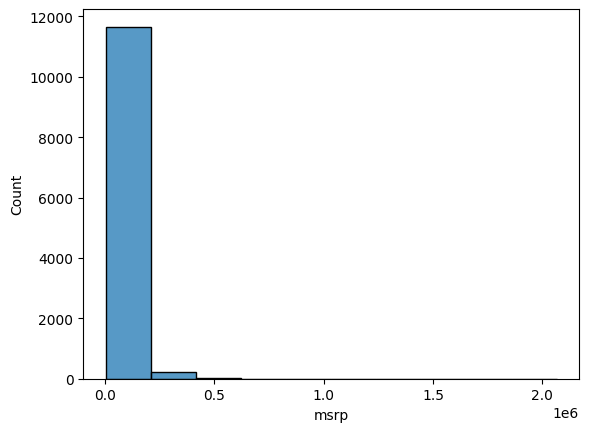

In [7]:
sns.histplot(df.msrp, bins=10)

Our target price MSRP has a long tail.

<Axes: xlabel='msrp', ylabel='Count'>

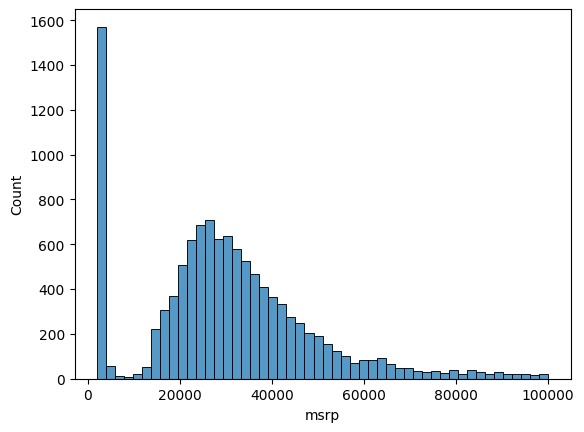

In [8]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

Let's apply logarithmic transformation to the target values because they are not normally distributed. We usually do this by `np.log1p()`, which adds 1 to each value before transforming it logarithmically. This is because some values may be 0 - which cannot be transformed - thus, we add 1 not only to those but to all.

In [9]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

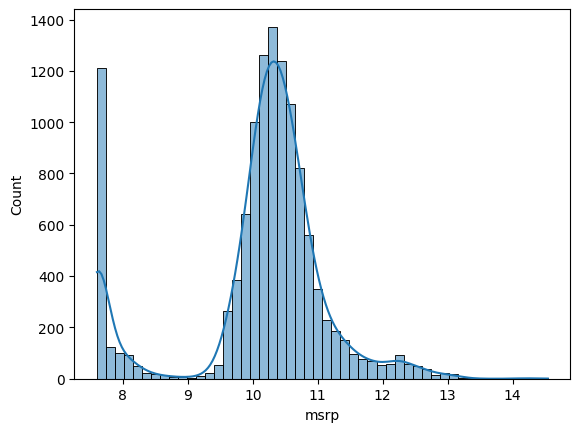

In [10]:
sns.histplot(price_logs, bins=50, kde=True)

##### **Missing values**

In [11]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

##### **Setting up the validation framework**

In [12]:
n = df.shape[0]

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [14]:
target_ids = np.arange(n)
target_ids

array([    0,     1,     2, ..., 11911, 11912, 11913])

We need to shuffle the records, before splitting them.

In [15]:
# To make our results reproducible, we have to set the seed
np.random.seed(2)
np.random.shuffle(target_ids)

In [16]:
df_train = df.iloc[target_ids[:n_train]]
df_val = df.iloc[target_ids[n_train:n_train+n_val]]
df_test = df.iloc[target_ids[n_train+n_val:]]

In [17]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [18]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
# We now apply log transformation to our target variable
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [21]:
# We remove the target variable from the original dataset
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

##### **Linear Regression**

Example: Looking at just 1 car.

In [22]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

Looking at just three features as an example.

In [23]:
# engine_hp, city_mpg, popularity
xi = [453, 11, 86]

In [24]:
# Setting bias term and weights for example only
bias = 7.17
w = [0.01, 0.04, 0.002]

In [25]:
def dot(xi, w):

    n = len(xi)

    prediction = 0
    for j in range(n):
        prediction += xi[j] * w[j]

    return prediction

In [26]:
xi_pred = dot(xi, w) + bias
xi_pred

12.312000000000001

We need to undo the logarithmic transformation of (y+1) by using `np.expm1()` which is $e^{y} - 1$.

In [27]:
np.expm1(xi_pred)

222347.22211010658

In [28]:
np.exp(xi_pred)

222348.22211010658

We actually can add the bias term to the weights matrix here, and just add another column to the feature matrix with values all equal to 1. It's not recommended, but we can try.

In [29]:
w_new = [bias] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [30]:
def single_linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [31]:
single_linear_regression(xi)

12.312

##### **Linear Regression vector form**

Let's add more records to our feature matrix.

In [32]:
# Setting bias term and weights for example only
bias = 7.17
w = [0.01, 0.04, 0.002]
w_new = [bias] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [33]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
# where 1 in each record is just to compensate the bias term that will be multiplied to it

X = np.array([x1, x2, x10])
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [34]:
def linear_regression(features, w):
    return features.dot(w)

In [35]:
linear_regression(X,w_new)

array([12.38 , 13.552, 12.312])

##### **Training Linear Regression: Normal Equation**

How do we actually come up with the weights?

Say: $$g(X) = X \cdot w \approx y $$

$$ X \cdot w = y $$
$$ X^{-1} \cdot X \cdot w = X^{-1} \cdot y $$
$$ I \cdot w = X^{-1} \cdot y $$
$$ w = X^{-1} \cdot y $$

But the feature matrix almost all of the time is not a square matrix, hence it cannot have an inverse. So the solution above is not plausible.

Say: $$ X^{T} \cdot X \cdot w = X^{T} \cdot y $$

$ X^{T} \cdot X $ is called `gram matrix`. It is a square, hence an inverse of it exists.

$$ (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot X \cdot w = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y $$
$$ I \cdot w = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y $$
$$ w = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y $$

Here, $w$ is the closest posssible solution to our system.

In [36]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [37]:
y = np.array([100,200,150,250,100,200,150,250,120])

$$ w = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y $$

In [38]:
# Implementing the gram matrix
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)

In [39]:
# Checking if our XTX_inv multiplied to XTX is an identity matrix
XTX_inv.dot(XTX)
# It's not exactly identity matrix, 
# but as close as possible because the other non-ones values are so small

array([[ 1.00000000e+00,  2.04393103e-17, -2.60003149e-17],
       [-2.71732913e-15,  1.00000000e+00,  2.36698614e-15],
       [ 3.42839762e-17,  9.23133564e-19,  1.00000000e+00]])

In [40]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([0.26190562, 3.06101252, 0.03696909])

In [41]:
# The bias term
bias = w_full[0]
weights = w_full[1:]
bias, weights

(0.2619056150598928, array([3.06101252, 0.03696909]))

In [42]:
# Summarizing everything in a function
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [43]:
train_linear_regression(X,y)

(300.06776692555627, array([-0.22774253, -2.5769413 , -0.02301206]))

##### **Baseline solution**

In [44]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [45]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [46]:
numbers = list(df_train.dtypes[(df_train.dtypes != 'O')].index)

In [47]:
numbers

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [48]:
# Excluding year and number of doors for simplicity
numbers.remove('year')
numbers.remove('number_of_doors')
numbers

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [49]:
X_train = df_train[numbers].values

In [50]:
df_train[numbers].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

We still have missing values $np.Nan$. The simplest thing to do is to replace these values with 0, but in reality we need to replace them with more reasonable values.

In [51]:
X_train = df_train[numbers].fillna(0).values

In [52]:
w0, w = train_linear_regression(X_train,y_train)

In [53]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

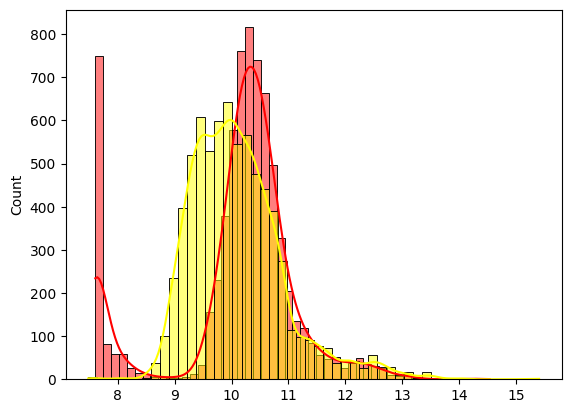

In [54]:
sns.histplot(y_train,color='red', alpha=0.5, bins=50, kde= True)
sns.histplot(y_pred, color='yellow', alpha=0.5, bins=50, kde=True)

In [55]:
# Summarizing everything into a function
def prepare_X(df):
    df_num = df[numbers]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [56]:
X_train = prepare_X(df_train)

In [57]:
w0, w = train_linear_regression(X_train, y_train)

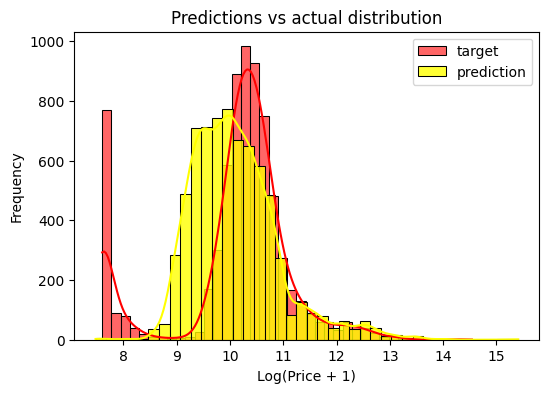

In [58]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40, kde=True)
sns.histplot(y_pred, label='prediction', color='yellow', alpha=0.8, bins=40, kde=True)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

##### **RMSE**

$$ RMSE = \sqrt {\frac 1m \sum (g(x_{i})-y_{i})^{2}}  $$

In [59]:
def rmse(y, y_pred):
    error = y_pred - y
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [60]:
rmse(y_train, y_pred)

0.7554192603920132

##### **Validating the model**

In [61]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [62]:
X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

In [63]:
rmse(y_val, y_pred_val)

0.7616530991301603

##### **Simple Feature Engineering**

We will use the year and transform it into age.

In [64]:
df_train.year.max()

2017

In [65]:
# Summarizing everything into a function
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = numbers + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [66]:
X_train = prepare_X(df_train)

In [67]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [68]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

rmse(y_val,y_pred_val)

0.5172055461058318

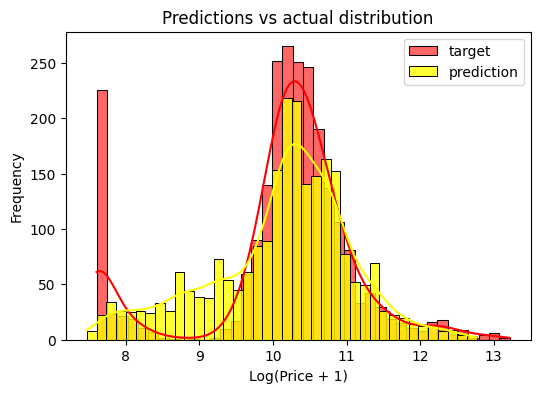

In [69]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='red', alpha=0.6, bins=40, kde=True)
sns.histplot(y_pred_val, label='prediction', color='yellow', alpha=0.8, bins=40, kde=True)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

##### **Categorical variables**

In [70]:
# Summarizing everything into a function
def prepare_X(df):
    df = df.copy()
    features = numbers.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [71]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

rmse(y_val,y_pred_val)

0.5157995641502688

Top 5 most popular make of cars

In [72]:
top_5 = list(df.make.value_counts().head().index)
top_5

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [73]:
# Summarizing everything into a function
def prepare_X(df):
    df = df.copy()
    features = numbers.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    for v in top_5:
        df[f'make_{v}'] = (df.make == v).astype('int')
        features.append(f'make_{v}')


    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [74]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

rmse(y_val,y_pred_val)

0.5076038849555264

Categories

In [75]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [76]:
categorical_variables = list(df_train.dtypes[df_train.dtypes ==  'O'].index)
categorical_variables

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [77]:
categorical_variables.remove('model') # not using model for now  because they are too many

In [78]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [79]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [80]:
# Summarizing everything into a function
def prepare_X(df):
    df = df.copy()
    features = numbers.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    for c, values in categories.items():
        for v in values:
            df[f'{c}_{v}'] = (df[c] == v).astype('int')
            features.append(f'{c}_{v}')

    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [81]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

rmse(y_val,y_pred_val)

67.28936064192382

##### **Regularization**

If the feature matrix has duplicate columns (or columns that can be expressed as a linear combination of other columns), it will not have an inverse matrix. But, sometimes this error could be passed if certain values are **slightly different between duplicated columns, but still they are numerically the same in weight**.

**Linear combination**

* One column is a linear combination of others when you can express one column of a matrix as a sum of others columns.

* The simplest example is when a column is an exact duplicate of another column.
* Another example. Let's say we have 3 columns: a, b, c. If c = 0.2 * a + 0.5 * b, then c is a linear combination of a and b

So, if we apply the normal equation with this feature matrix, the values associated with duplicated columns are very large, which decreases the model performance. To solve this issue, one alternative is adding a small number to the diagonal of the feature matrix, which corresponds to regularization.

This technique works because the addition of small values to the diagonal makes it less likely to have duplicated columns. The regularization value is a hyperparameter of the model. After applying regularization the model performance improved.

In [82]:
# Modifying our train linear regression function
def train_linear_regression_regularized(X,y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


In [83]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_regularized(X_train, y_train,r=0.001)
X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

rmse(y_val,y_pred_val)

0.4565175088349574

We got a much better result now after we regularized the features weights.

##### **Tuning the model**

Finding the best value for the regularization parameter $r$.

In [84]:
r_values = []
rmse_values = []
for r in np.linspace(0,1,10000):
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_regularized(X_train, y_train,r=r)
    X_val = prepare_X(df_val)
    y_pred_val = w0 + X_val.dot(w)

    rmse_value = rmse(y_val,y_pred_val)
    r_values.append(r)
    rmse_values.append(rmse_value)

In [85]:
data_plot = pd.DataFrame({'r':r_values,'rmse':rmse_values})

In [86]:
data_plot

,r,rmse
0,0.0000,67.289361
1,0.0001,0.456517
2,0.0002,0.456517
3,0.0003,0.456517
4,0.0004,0.456517
...,...,...
9995,0.9996,0.457220
9996,0.9997,0.457220
9997,0.9998,0.457220
9998,0.9999,0.457220


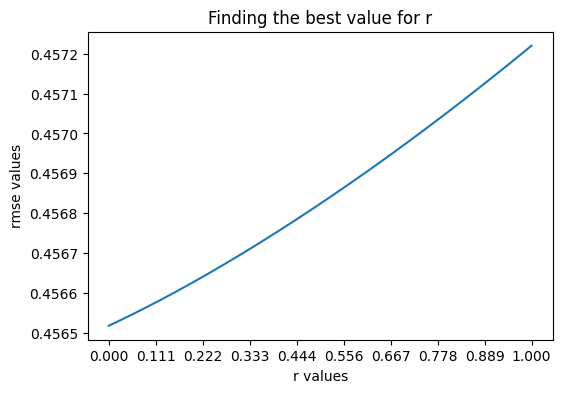

In [87]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=r_values[1:], y=rmse_values[1:],data=data_plot[1:])
#plt.legend()

plt.ylabel('rmse values')
plt.xlabel('r values')
plt.xticks(np.linspace(0,1,10))
plt.title('Finding the best value for r')

plt.show()

In [88]:
data_plot.rmse.min()

0.45651706467878783

In [89]:
data_plot.loc[data_plot['rmse'] == data_plot.rmse.min()]

,r,rmse
1,0.0001,0.456517


##### **Training the final model**

We combine the train and validation dataset, and  train our model with the combined dataset before we test it to our test dataset.

In [90]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [91]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

Concatenating the targets of the train and validation datasets.

In [92]:
y_full_train = np.concatenate([y_train,y_val])

Training the model

In [93]:
w0, w = train_linear_regression_regularized(X_full_train,y_full_train,r=0.0001)

In [94]:
X_test = prepare_X(df_test)
y_pred_test = w0 + X_test.dot(w)

rmse_test_score = rmse(y_val,y_pred_val)
rmse_test_score

0.45722043179959915

Predicting the price of a car using our model.

In real-life scenario, the values will come in as a dictionary. Let's simulate that:

In [95]:
# Example car
car = df_test.iloc[20].to_dict()

Then, we need to transform our dictionary into a Pandas Dataframe.

In [96]:
df_test_car = pd.DataFrame([car])
df_test_car

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


Preparing our data.

In [97]:
X_test_car = prepare_X(df_test_car)
y_pred = w0 + X_test_car.dot(w)
y_pred = y_pred[0]
y_pred

10.462659382760263

Then, we need to transform it back to its original scale.

In [98]:
np.expm1(y_pred)

34983.46492881741

Comparing it with the actual price of the car.

In [99]:
np.expm1(y_test[20])

35000.00000000001

##### **We are very close! Nice prediction.**

$$ :) $$